# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

The fisrt option is selected. Below is shown a picture of the best path found to connect all the provinces in Italy. The picture is obtained using the code of Exercise 9 but with 100000 steps, so it takes a lot of time to run.

In [2]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.3/940.3 kB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.1
    Uninstalling matplotlib-3.9.1:
      Successfully uninstalled matplotlib-3.9.1

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, r

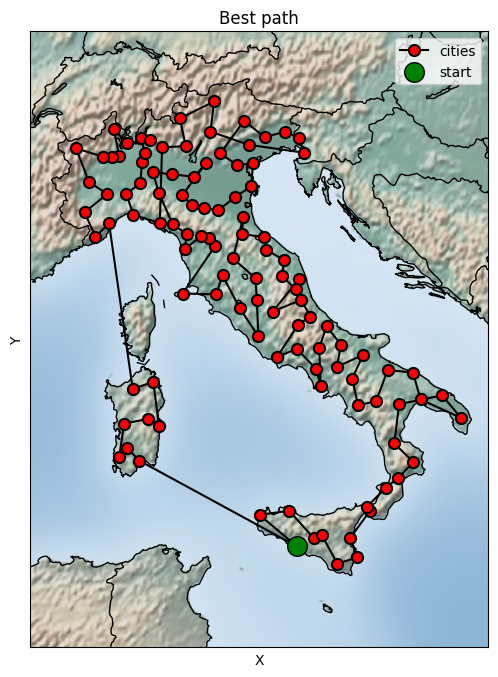

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.loadtxt('coordinates_prov.out')

x = data[:, 1] 
y = data[:, 2]  

plt.figure(figsize=(10, 8))

m = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=48, llcrnrlon=6, urcrnrlon=19, resolution='i')

m.shadedrelief()

m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)

x_map, y_map = m(x, y)

m.plot(x_map, y_map, marker='o', linestyle='-', color='black', markerfacecolor='red', markersize=8, markeredgewidth=1.5, label='cities')

m.scatter(x_map[0], y_map[0], s=200, color='green', edgecolor='black', zorder=10, marker='o', label='start')

plt.title('Best path')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.grid(True)
plt.show()


The path length is $L=75.1426$. We now parallelize the algorithm used to see if we can achieve improvement both in finding a better length and in reducing running time.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

Below, we present the best path and its length for different numbers of processors, comparing the cases where they communicate and do not communicate. (5000 steps)

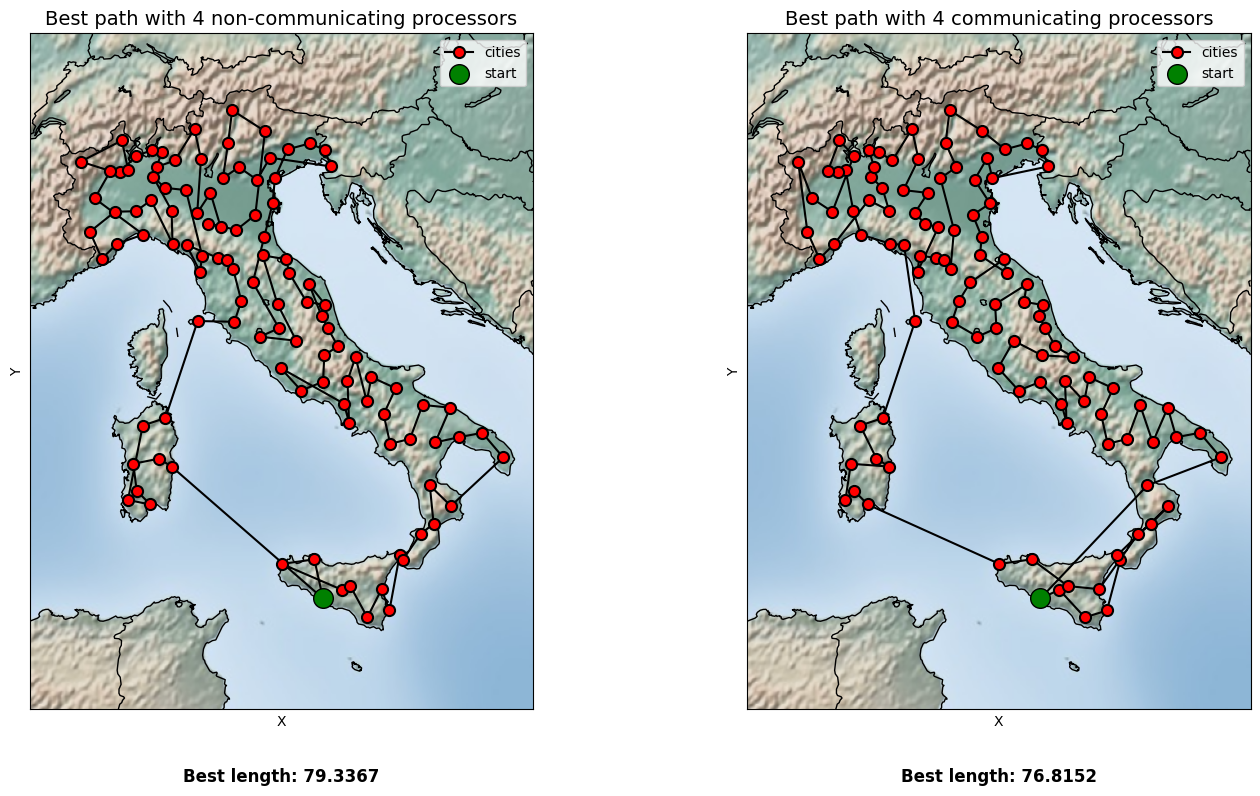

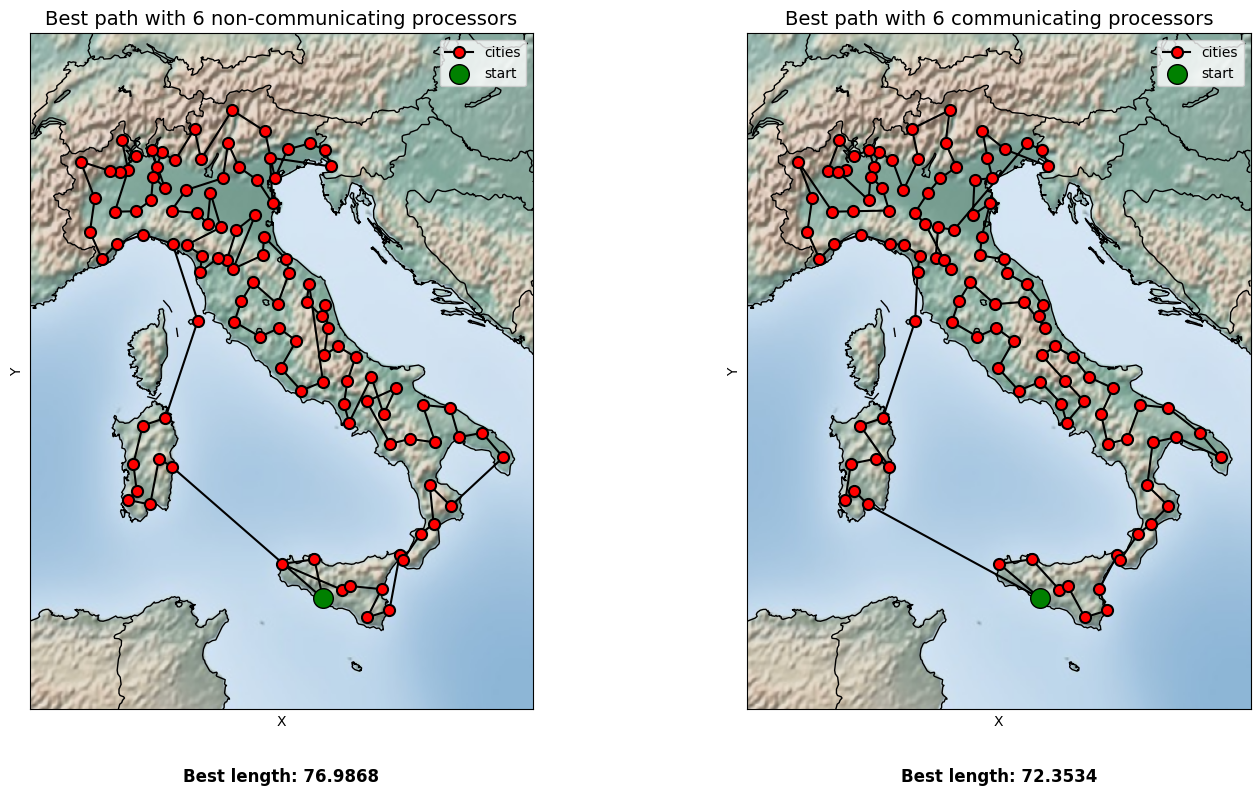

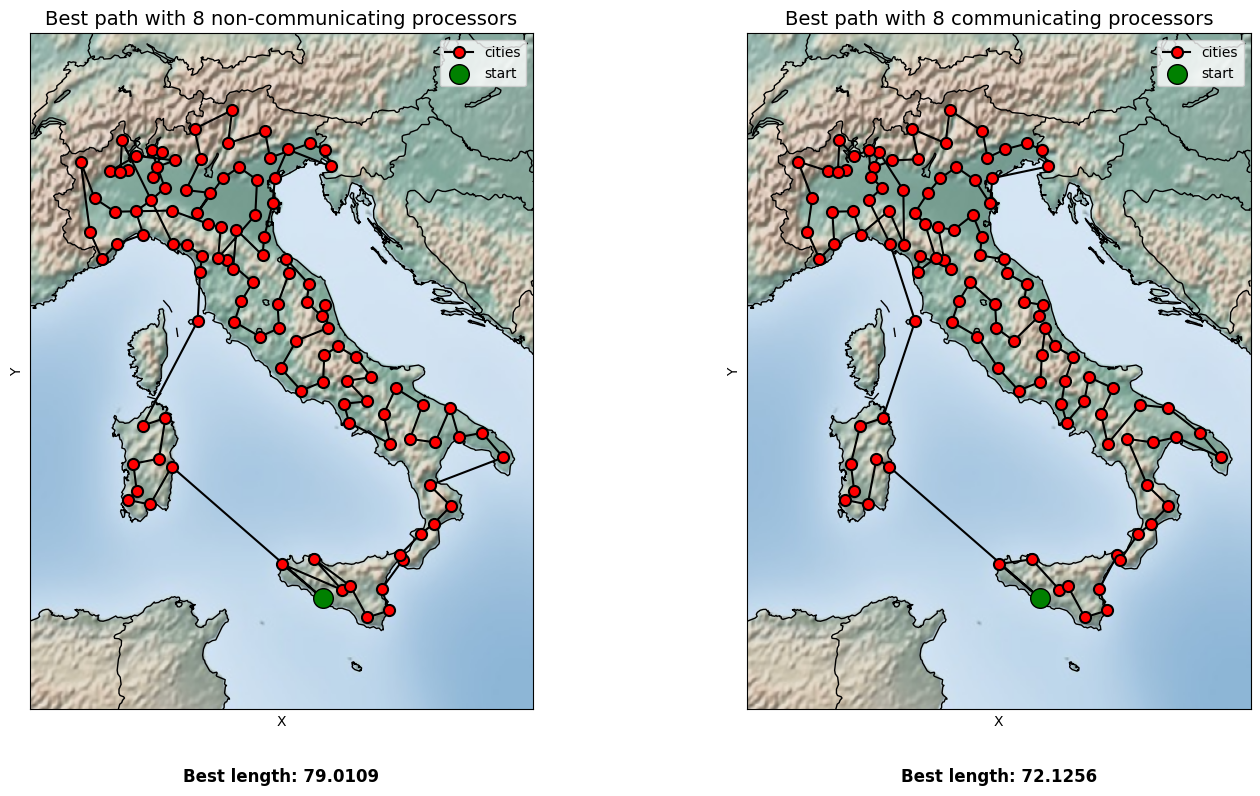

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

for num_processors in [4, 6, 8]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    for i, flag_value in enumerate(["FALSE", "TRUE"]):
        with open(f'coordinates_{num_processors}_{flag_value}.out', 'r') as file:
            lines = file.readlines()

        data = np.loadtxt(lines[:-1])

        x = data[:, 1]
        y = data[:, 2]

        m = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=48, llcrnrlon=6, urcrnrlon=19, resolution='i', ax=axes[i])
        m.shadedrelief()
        m.drawcoastlines(linewidth=1)
        m.drawcountries(linewidth=1)
        x_map, y_map = m(x, y)
        m.plot(x_map, y_map, marker='o', linestyle='-', color='black', markerfacecolor='red', markersize=8, markeredgewidth=1.5, label='cities')
        m.scatter(x_map[0], y_map[0], s=200, color='green', edgecolor='black', zorder=10, marker='o', label='start')
        if(flag_value == "TRUE"):
            axes[i].set_title(f'Best path with {num_processors} communicating processors', fontsize=14)
        elif flag_value == "FALSE":
            axes[i].set_title(f'Best path with {num_processors} non-communicating processors', fontsize=14)
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend()
        axes[i].grid(True)
    
        best_length = float(lines[-1].split()[0])
        axes[i].text(0.5, -0.1, f'Best length: {best_length}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()


We can see that allowing the processors to communicate makes finding the best length more efficient. Additionally, increasing the number of processors from 6 to 8 does not significantly improve the results.